In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('../data/mmALL_073119_csv.csv')

# Basic Review of the Dataframe

In [21]:
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...


In [22]:
df.shape

(16363, 31)

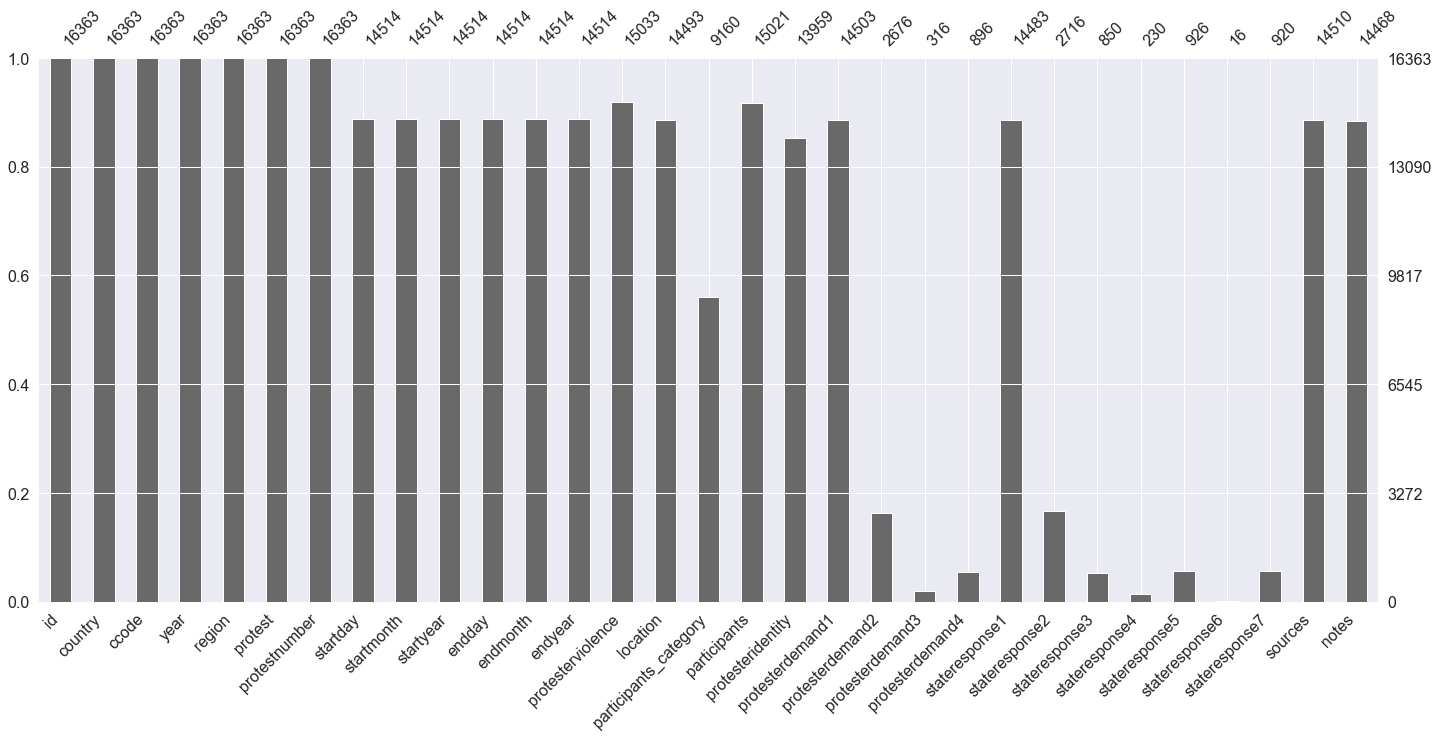

In [23]:
sns.set()
msno.bar(df);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [25]:
categorical_columns = ['country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'protesterviolence',  'participants_category',
       'participants', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']

numerical_columns = ['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',]

id_columns = ['id','sources','notes', 'protesteridentity', 'location']

In [26]:
for column in categorical_columns:
    df[column].fillna('999', inplace=True)
for column in numerical_columns:
    df[column].fillna(999, inplace=True)

In [27]:
def bar_plot(df, columns):
    for category in columns:

        y_names = df[category].value_counts().index
        width = df[category].value_counts()

        plt.figure(figsize=(6,(len(y_names)/4)))
        plt.barh(y_names,width)
        plt.title('Category is: ' + category)
        plt.ylabel('category names')
        plt.xlabel('Number of values in a category')
        plt.show()

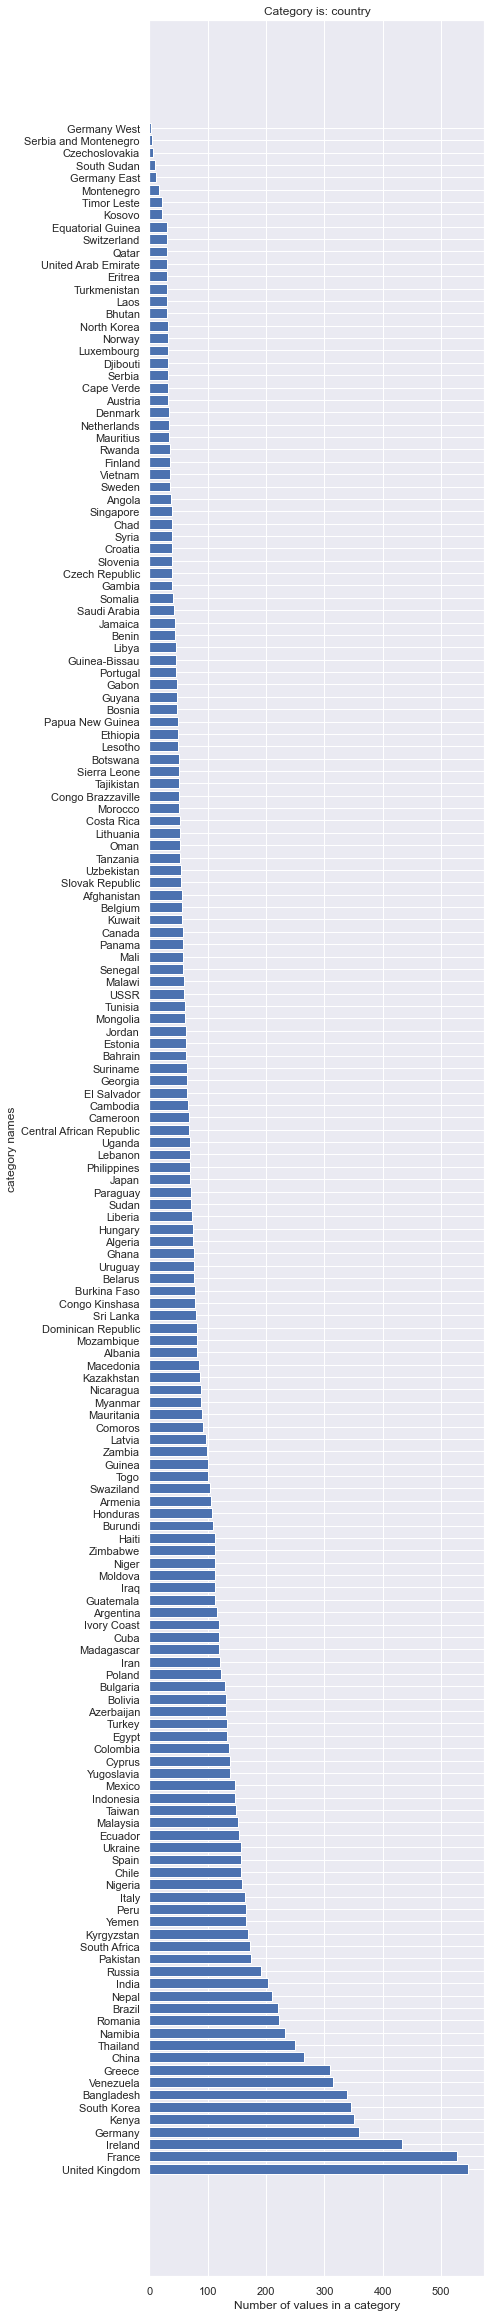

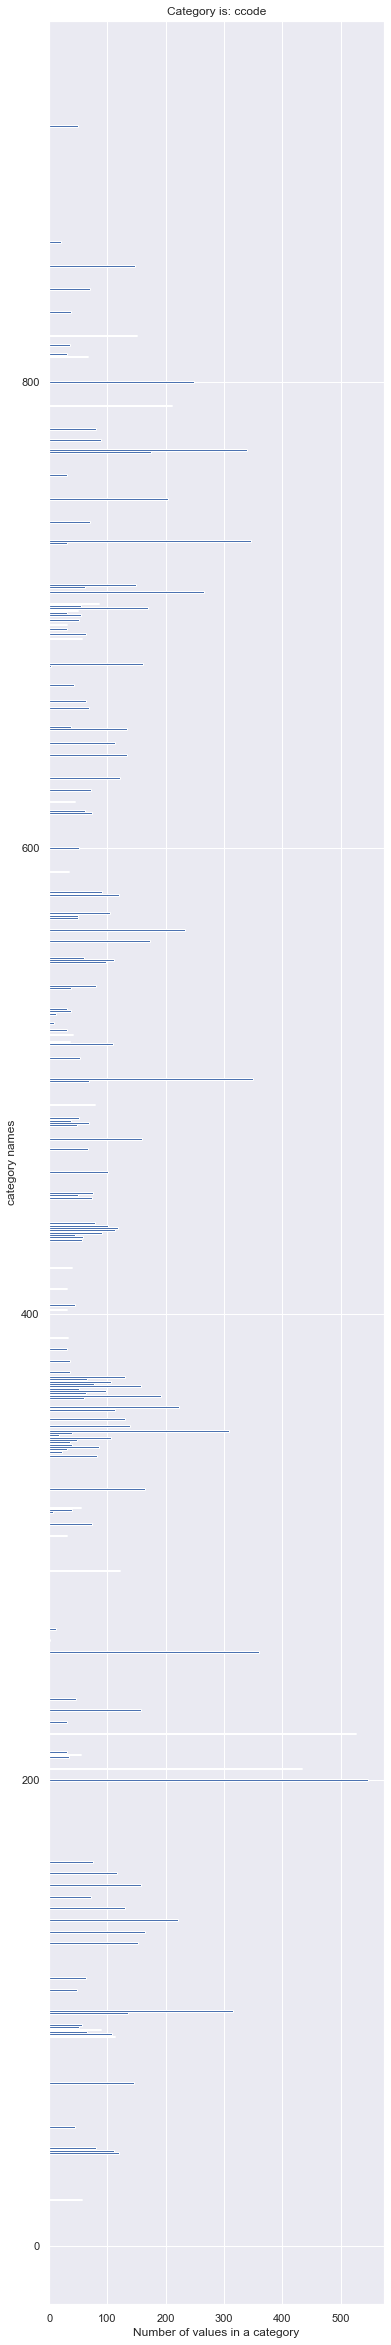

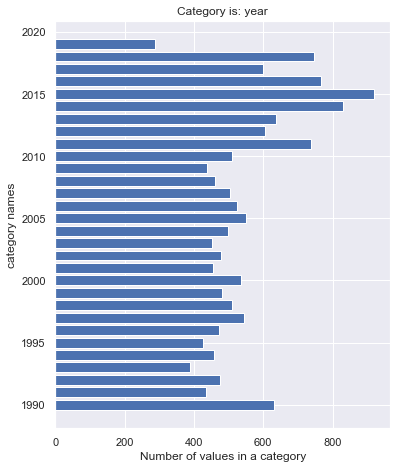

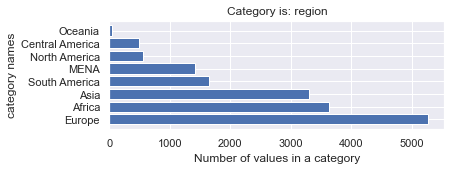

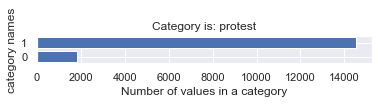

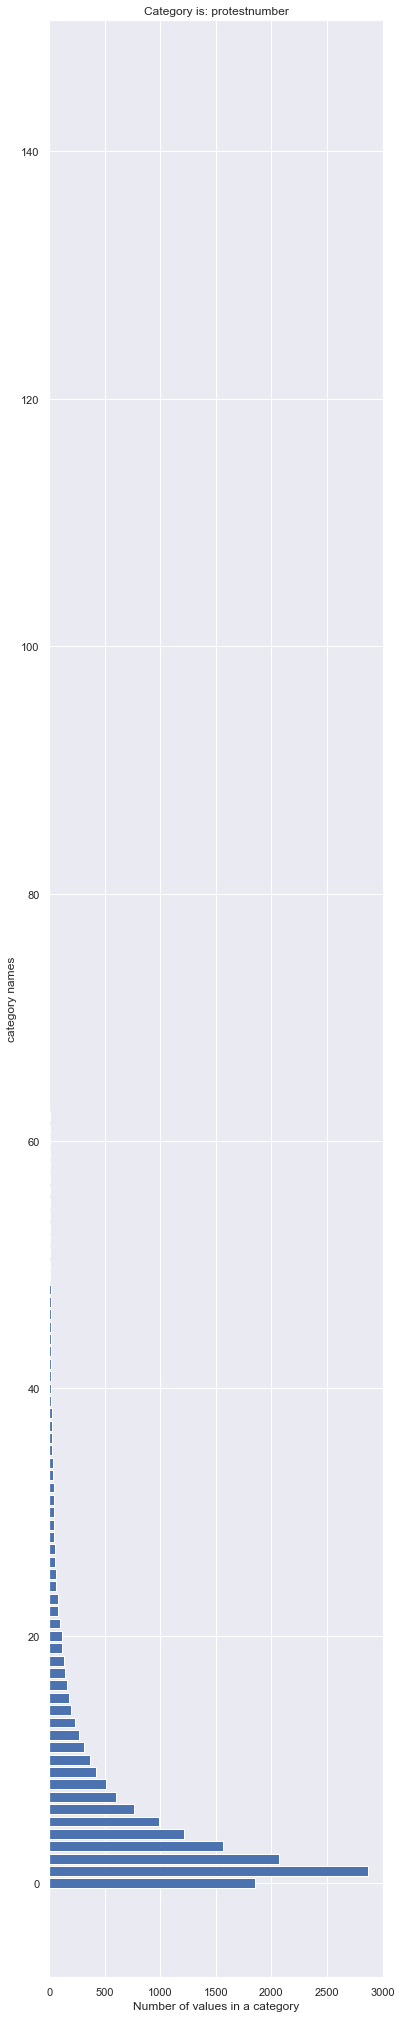

TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

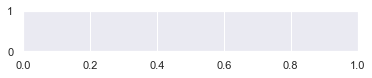

In [28]:
bar_plot(df, categorical_columns)

In [29]:
# Data engineering: length of protests
df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [30]:
protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']

In [31]:
protest_demands_portion = pd.get_dummies(protest_demands, prefix="dem")
state_response_portion = pd.get_dummies(state_responses, prefix='resp')
df = pd.concat([df,protest_demands_portion,state_response_portion], axis = 1)

In [32]:
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,dem_protesterdemand2,dem_protesterdemand3,dem_protesterdemand4,resp_stateresponse1,resp_stateresponse2,resp_stateresponse3,resp_stateresponse4,resp_stateresponse5,resp_stateresponse6,resp_stateresponse7
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


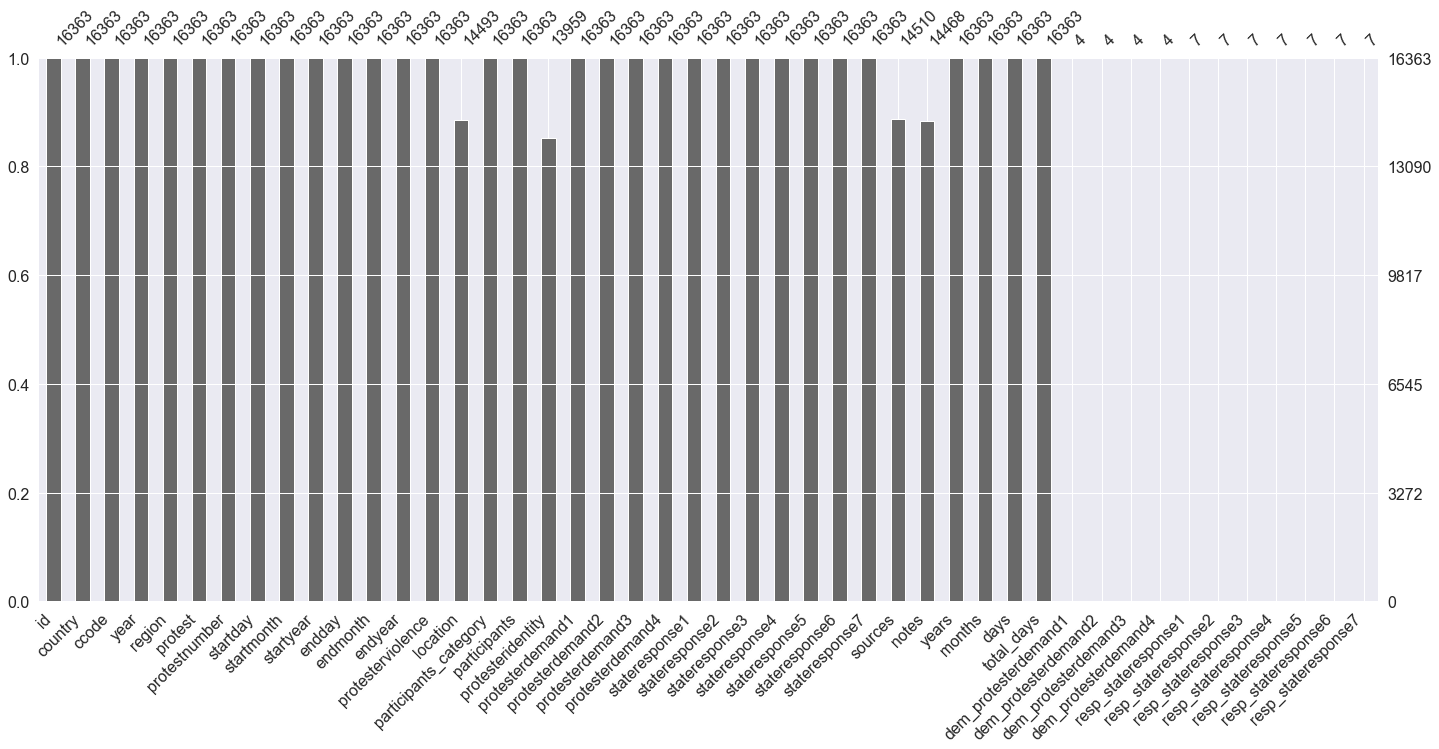

In [33]:
msno.bar(df);

In [34]:
df.to_csv('../data/base_df.csv')